In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#drop cabin column since over 77% of data is missing

train_data = train_data.drop(['Cabin'],axis=1)

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
filtered_null_age_data = train_data[train_data.Age.isnull()]
filtered_null_age_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [7]:
import matplotlib.pyplot as plt

52
125
0.2937853107344633


(array([125.,  52.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

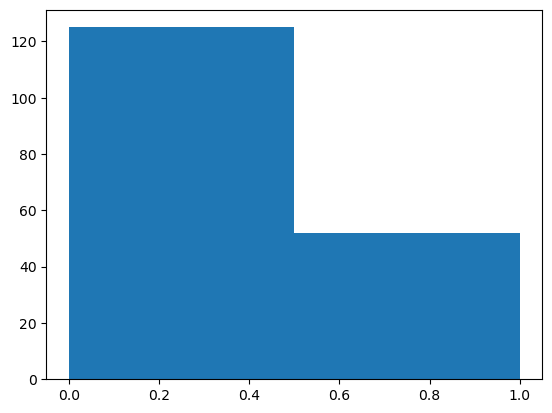

In [8]:
print(len(filtered_null_age_data[filtered_null_age_data['Survived']==1]))
print(len(filtered_null_age_data[filtered_null_age_data['Survived']==0]))

print(len(filtered_null_age_data[filtered_null_age_data['Survived']==1])/len(filtered_null_age_data))
plt.hist(filtered_null_age_data['Survived'],bins=2)

342
549
0.3838383838383838


(array([549., 342.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

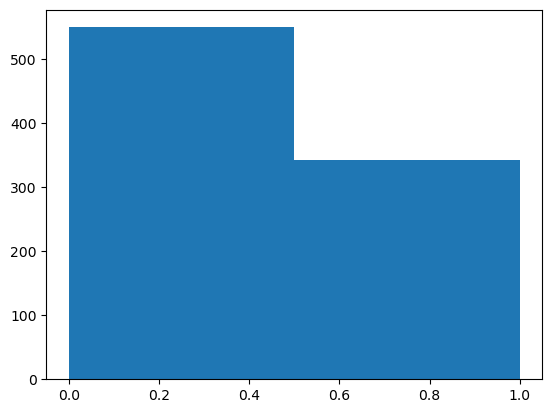

In [9]:
print(len(train_data[train_data['Survived']==1]))
print(len(train_data[train_data['Survived']==0]))

print(len(train_data[train_data['Survived']==1])/len(train_data))
plt.hist(train_data['Survived'],bins=2)

In [10]:
#Age data - 20% missing - Imputation necessary. Trying Mean Imputation

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [11]:
train_data = train_data.dropna()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
train_data.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [14]:
train_data = train_data.drop(['PassengerId','Name','Ticket'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
one_hot_encoded_train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked'])
one_hot_encoded_train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [16]:
one_hot_encoded_train_data = one_hot_encoded_train_data.drop(['Sex_female'],axis=1)
one_hot_encoded_train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


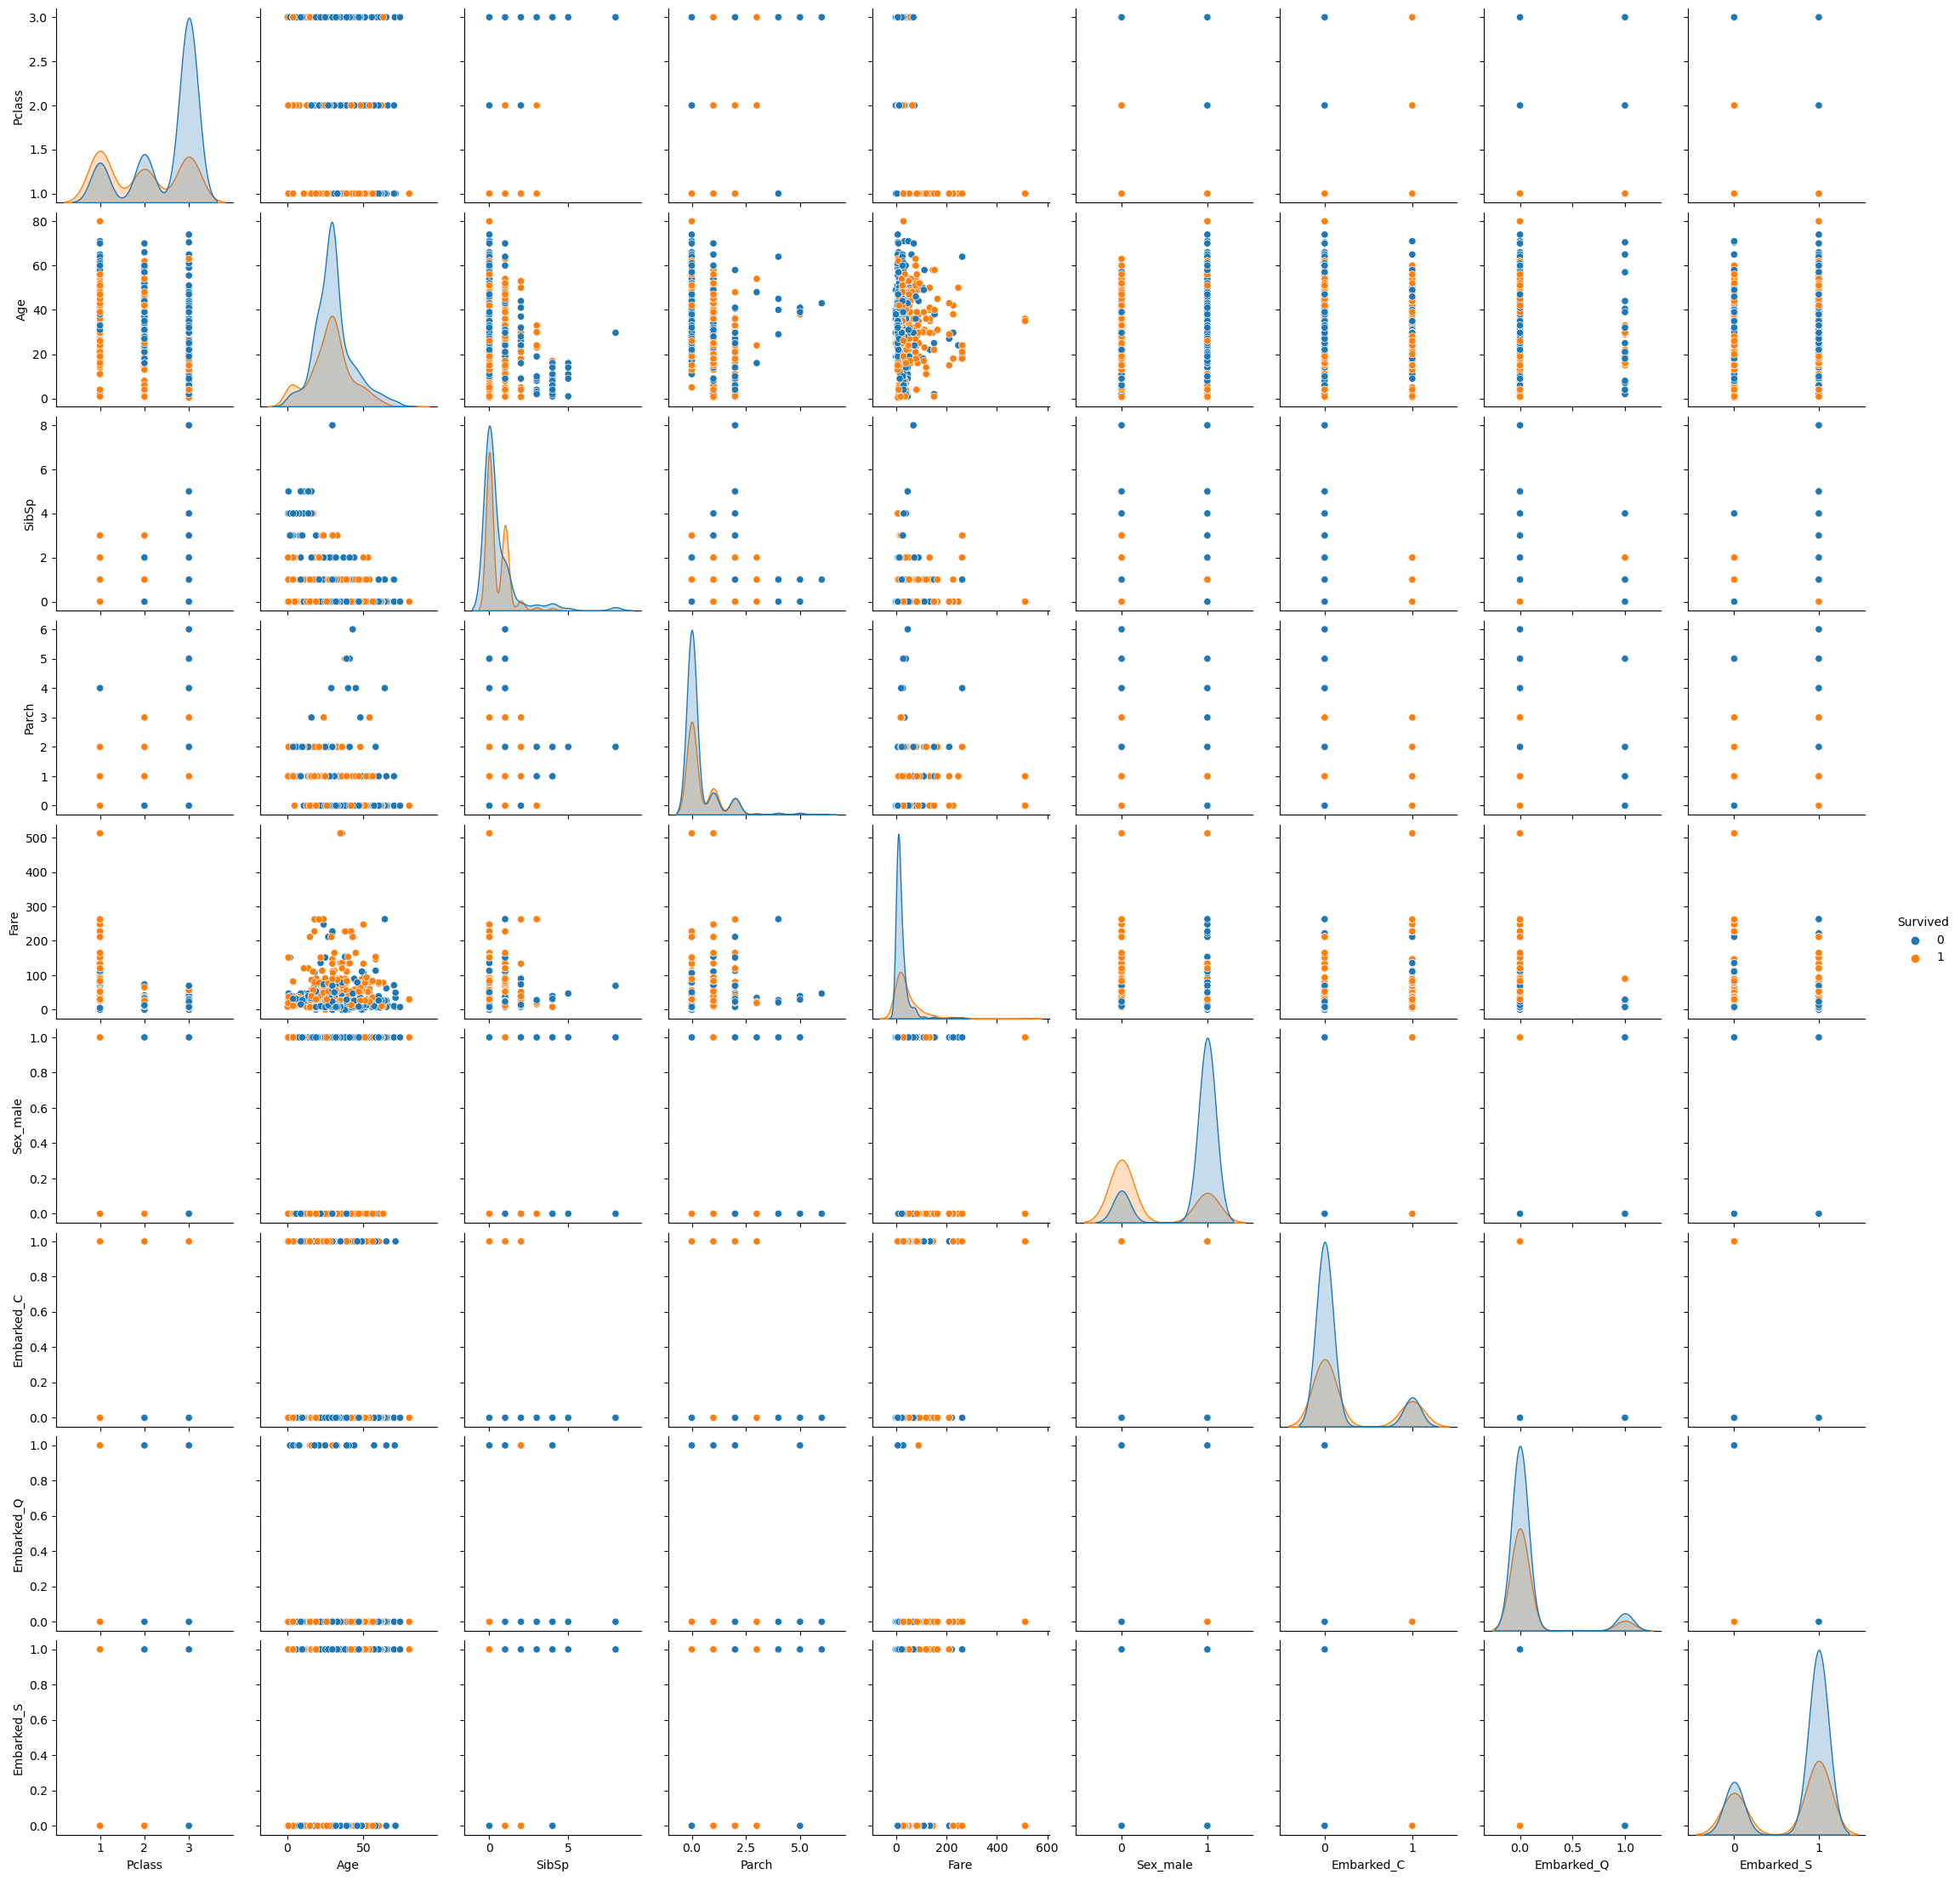

In [17]:
import seaborn as sns
sns.pairplot(one_hot_encoded_train_data,hue='Survived')

<AxesSubplot:>

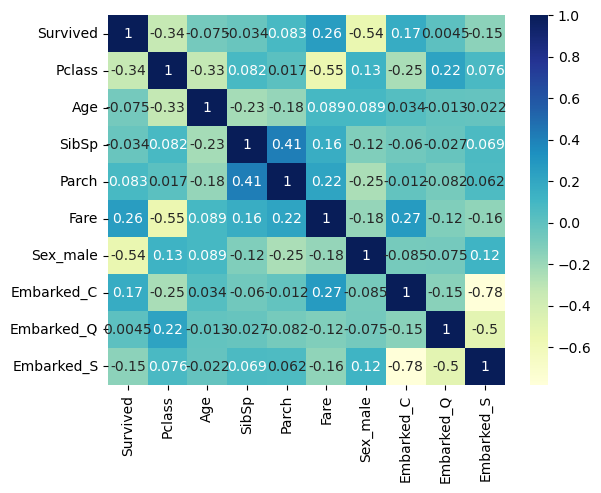

In [18]:
sns.heatmap(one_hot_encoded_train_data.corr(), cmap="YlGnBu", annot=True)

In [19]:
X = one_hot_encoded_train_data.drop(['Survived'],axis=1)
y = one_hot_encoded_train_data['Survived']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
!pip install pyforest
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

  Preparing metadata (setup.py) ... - done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=4633e5619bdc0e3e3c2f989e6b8c043757b975ff679b873bd7978e8c242d21ee
  Stored in directory: /root/.cache/pip/wheels/47/71/cf/19fb0cf38546968bb5924e9d069d62bcdaf6c7fe8ff11b14f1
Successfully built pyforest


In [23]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [24]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 12.50it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.83,0.81,0.81,0.83,0.04
AdaBoostClassifier,0.81,0.81,0.81,0.82,0.12
NuSVC,0.81,0.81,0.81,0.81,0.04
XGBClassifier,0.81,0.80,0.80,0.81,0.46
QuadraticDiscriminantAnalysis,0.80,0.80,0.80,0.80,0.01
LabelPropagation,0.79,0.79,0.79,0.79,0.07
LGBMClassifier,0.80,0.79,0.79,0.80,0.50
KNeighborsClassifier,0.79,0.79,0.79,0.79,0.02
LabelSpreading,0.79,0.78,0.78,0.79,0.09


In [25]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred= classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[89, 20],
       [16, 53]])

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.790 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.789 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.761 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.775 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.790 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.789 total time=   0.5s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.761 total time=   0.2s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.775 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.790 total time=   0.2s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [30]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, gamma=1, kernel='linear')


In [31]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



In [32]:
#test data predictions

In [33]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
test_data_2 = test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [36]:
test_data_2['Fare'] = test_data_2['Fare'].fillna(test_data_2['Fare'].mean())
test_data_2['Age'] = test_data_2['Age'].fillna(test_data_2['Age'].mean())
test_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [37]:
one_hot_encoded_test_data = pd.get_dummies(test_data_2, columns = ['Sex', 'Embarked'])
one_hot_encoded_test_data = one_hot_encoded_test_data.drop(['Sex_female'],axis=1)
one_hot_encoded_test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50,0,0,7.83,1,0,1,0
1,3,47.00,1,0,7.00,0,0,0,1
2,2,62.00,0,0,9.69,1,0,1,0
3,3,27.00,0,0,8.66,1,0,0,1
4,3,22.00,1,1,12.29,0,0,0,1


In [38]:
grid_test_predictions = grid.predict(one_hot_encoded_test_data)
test_predictions = pd.DataFrame(data=grid_test_predictions,index=test_data['PassengerId'],columns=['Survived'])
test_predictions.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


(array([268., 150.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

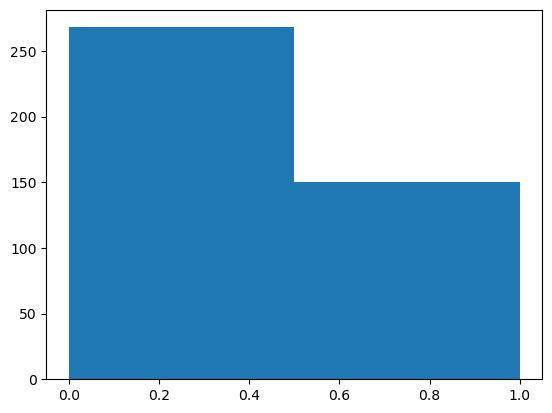

In [39]:
plt.hist(test_predictions,bins=2)

In [40]:
test_predictions.to_csv(index=True)

'PassengerId,Survived\n892,0\n893,1\n894,0\n895,0\n896,1\n897,0\n898,1\n899,0\n900,1\n901,0\n902,0\n903,0\n904,1\n905,0\n906,1\n907,1\n908,0\n909,0\n910,1\n911,1\n912,0\n913,0\n914,1\n915,0\n916,1\n917,0\n918,1\n919,0\n920,0\n921,0\n922,0\n923,0\n924,1\n925,1\n926,0\n927,0\n928,1\n929,1\n930,0\n931,0\n932,0\n933,0\n934,0\n935,1\n936,1\n937,0\n938,0\n939,0\n940,1\n941,1\n942,0\n943,0\n944,1\n945,1\n946,0\n947,0\n948,0\n949,0\n950,0\n951,1\n952,0\n953,0\n954,0\n955,1\n956,0\n957,1\n958,1\n959,0\n960,0\n961,1\n962,1\n963,0\n964,1\n965,0\n966,1\n967,0\n968,0\n969,1\n970,0\n971,1\n972,0\n973,0\n974,0\n975,0\n976,0\n977,0\n978,1\n979,1\n980,1\n981,0\n982,1\n983,0\n984,1\n985,0\n986,0\n987,0\n988,1\n989,0\n990,1\n991,0\n992,1\n993,0\n994,0\n995,0\n996,1\n997,0\n998,0\n999,0\n1000,0\n1001,0\n1002,0\n1003,1\n1004,1\n1005,1\n1006,1\n1007,0\n1008,0\n1009,1\n1010,0\n1011,1\n1012,1\n1013,0\n1014,1\n1015,0\n1016,0\n1017,1\n1018,0\n1019,1\n1020,0\n1021,0\n1022,0\n1023,0\n1024,1\n1025,0\n1026,0\n1027,

In [41]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [42]:
#ANN

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model = Sequential()
model.add(Dense(9,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
23/23 [==============================] - 2s 14ms/step - loss: 0.6745 - accuracy: 0.5963 - val_loss: 0.6549 - val_accuracy: 0.6124
Epoch 2/600
23/23 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6188 - val_loss: 0.6331 - val_accuracy: 0.6124
Epoch 3/600
23/23 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.6188 - val_loss: 0.6197 - val_accuracy: 0.6124
Epoch 4/600
23/23 [==============================] - 0s 4ms/step - loss: 0.6177 - accuracy: 0.6188 - val_loss: 0.6058 - val_accuracy: 0.6124
Epoch 5/600
23/23 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.6188 - val_loss: 0.5920 - val_accuracy: 0.6124
Epoch 6/600
23/23 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.6188 - val_loss: 0.5806 - val_accuracy: 0.6124
Epoch 7/600
23/23 [==============================] - 0s 4ms/step - loss: 0.5797 - accuracy: 0.6188 - val_loss: 0.5653 - val_accuracy: 0.6067
Epoch 8/600


<AxesSubplot:>

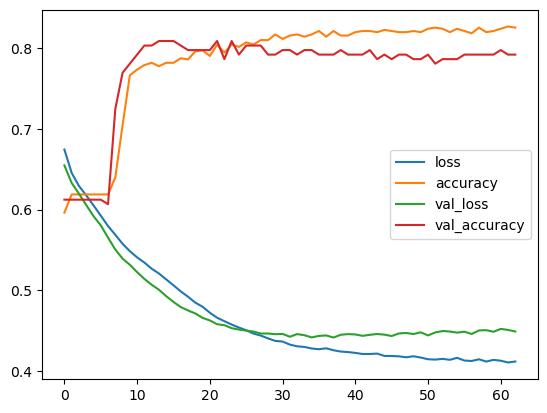

In [48]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [49]:
predictions = model.predict(X_test).round()
print(classification_report(y_test,predictions))

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       109
           1       0.76      0.68      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178

